In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
wine_dataset=pd.read_csv('winequality-red.csv')

In [ ]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


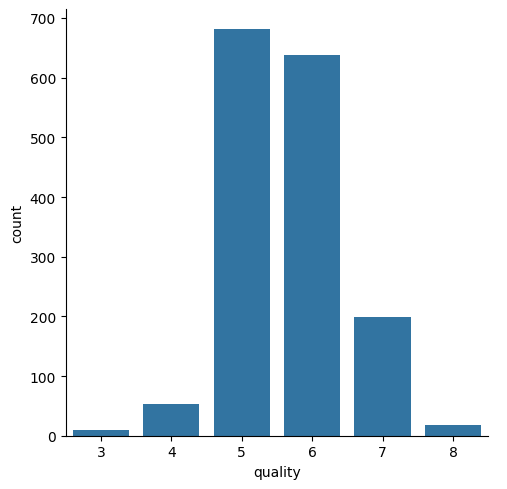

In [ ]:
sns.catplot(x="quality",data=wine_dataset, kind="count")
plt.show() #this function is mandataory in pycharm to see the plot

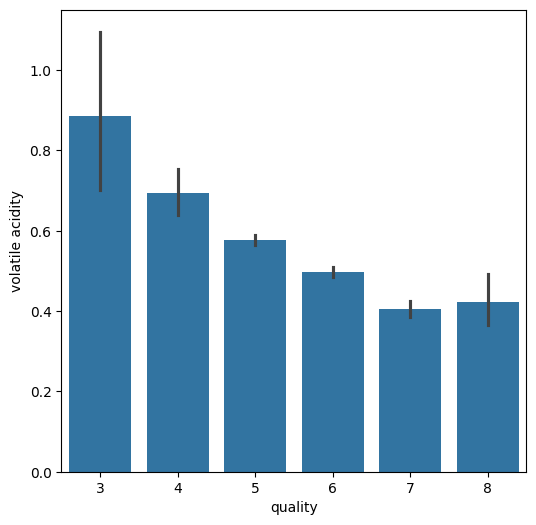

In [ ]:
  plt.figure(figsize=(6,6))
sns.barplot(x="quality",y="volatile acidity",data=wine_dataset)
plt.show()


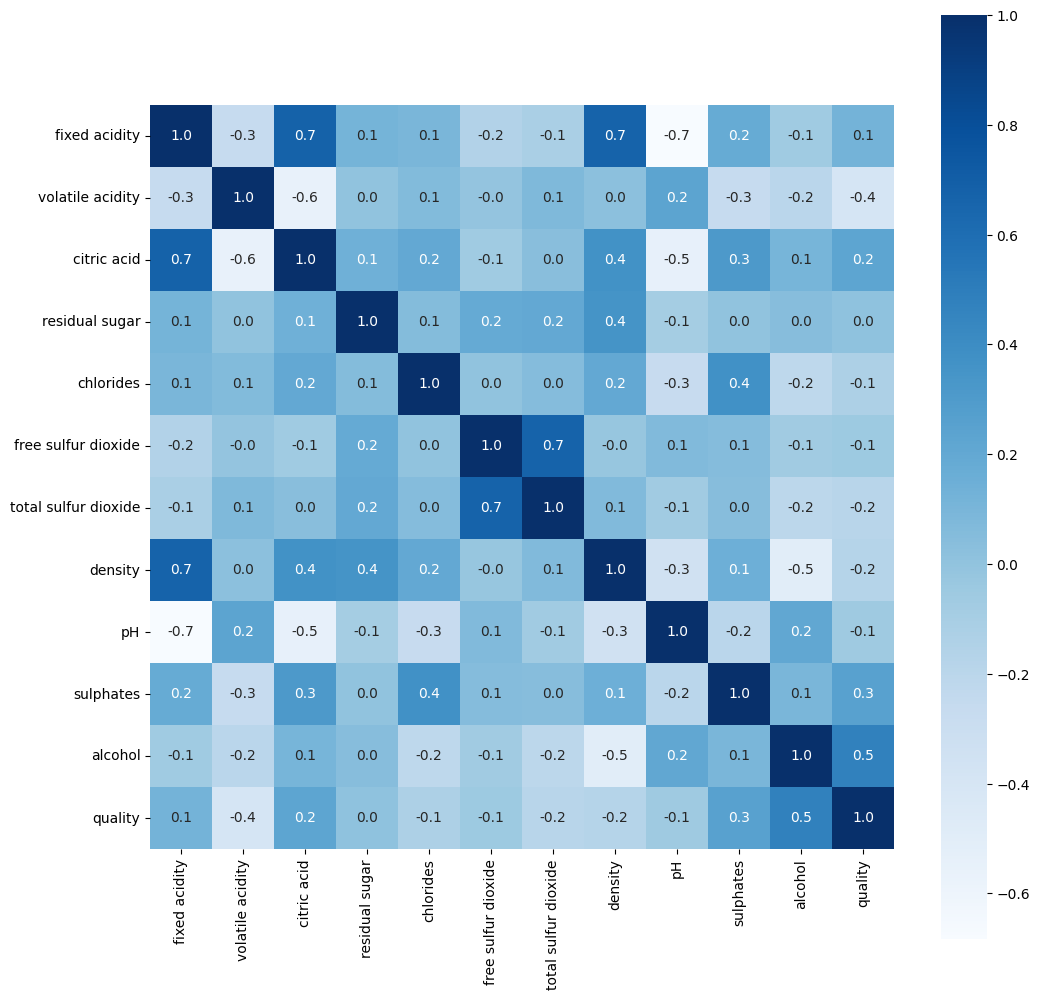

In [ ]:
correlation=wine_dataset.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={"size":10},annot=True,cmap="Blues")
plt.show()

Data Preprocessing

In [ ]:
# Separate the data and label
X=wine_dataset.drop("quality",axis=1) # axis=1 for col and axis=0 for row
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
Y=wine_dataset["quality"].apply(lambda y_val: 1 if y_val>=7 else (2 if 4<=y_val<=6 else 0))

In [ ]:
print(Y)

0       2
1       2
2       2
3       2
4       2
       ..
1594    2
1595    2
1596    2
1597    2
1598    2
Name: quality, Length: 1599, dtype: int64


In [ ]:
  # Train and Test Split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


In [ ]:
# Model training
model=RandomForestClassifier()
model.fit(X_train.values,Y_train.values)

RandomForestClassifier()

In [ ]:
X_test_prediction=model.predict(X_test.values)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print(test_data_accuracy)

0.91875


In [ ]:
# Building the Predictive model
demo_test=(7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5)
data_d=[]
q=input("Do you want to run your data set or demo set? write \"demo\" to run demo or \"test\" to run your own test case: ")
if(q=="demo"):
  ans=np.asarray(demo_test)
  ans_reshape=ans.reshape(1,-1) # one row and col accordingly to run for one instance
  prediction=model.predict(ans_reshape)
  if(prediction==1):
    print("Excllent Quality Wine")

else:
  lst=[]
  fa=input("Enter the value of Fixed Acidity: ")
  va=input("Enter the value of Volatile Acidity: ")
  ca=input("Enter the value of Citric Acid: ")
  rs=input("Enter the value of Residual Sugar: ")
  cl=input("Enter the value of Chlorides: ")
  so=input("Enter the value of Free Sulphur Dioxide: ")
  tso=input("Enter the value of Total Sulphur Dioxide: ")
  d=input("Enter the value of Density: ")
  ph=input("Enter the value of PH value: ")
  sh=input("Enter the value of Sulphates: ")
  al=input("Enter the value of Alcohol: ")


  lst.append(fa)
  lst.append(va)
  lst.append(ca)
  lst.append(rs)
  lst.append(cl)
  lst.append(so)
  lst.append(tso)
  lst.append(d)
  lst.append(ph)
  lst.append(sh)
  lst.append(al)

  ans=np.asarray(lst)
  ans_reshape=ans.reshape(1,-1)
  prediction=model.predict(ans_reshape)
  if(prediction==1):
    print("Excellent Quality Wine")
  elif (prediction==2):
    print("Mediocre Quality Wine")
  else:
    print("Poor Quality Wine")



Do you want to run your data set or demo set? write "demo" to run demo data test: test
Enter the value of Fixed Acidity: 8.98899
Enter the value of Volatile Acidity: 0.23444
Enter the value of Citric Acid: 0.032
Enter the value of Residual Sugar: 1.4
Enter the value of Chlorides: 0.083465
Enter the value of Free Sulphur Dioxide: 15.3455
Enter the value of Total Sulphur Dioxide: 21.76777
Enter the value of Density: 0.9995
Enter the value of PH value: 3.421
Enter the value of Sulphates: 0.7578
Enter the value of Alcohol: 11.5765
Mediocre Quality Wine
